In [1]:
from skimage.feature import hog
from skimage.feature import local_binary_pattern
import cv2 
import os
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import joblib


In [4]:
# method to create data set
def create_dataset3(fruit_path, person_path, car_path, descriptor):
    
    # list to store extracted features of an image
    features = []
    
    # list to store class label, 1 for live, 0 for spoof
    labels = []    
    
    radius = 3
    
    # number of neighbors to consider for LBP
    n_points = 8 * radius 
    
    # sampling type for LBP
    METHOD = 'uniform'       
    
    path_array = [fruit_path, person_path, car_path]
    
    for path in path_array:
        
        # storing all images in a folder in a list 'files'
        files = os.listdir(path) 
        # loop through the images in the folder
        for img in files:
#             print(path + img)
            # reading the image in grayscale using cv2
            img = cv2.imread(path +'/'+ img, cv2.IMREAD_GRAYSCALE)
            
            # resizing the image so all images are of same size
            resized_img = cv2.resize(img, (100, 100))  
            
            # Extracting features of an image using LBP
            if descriptor == 'LBP':    
                lbp = local_binary_pattern(resized_img, n_points, radius, METHOD)
                
                 # Converting into 1-D array
                feature=lbp.flatten()
                
            # Extracting features of an image using HOG     
            elif descriptor == 'HOG': 
                feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), visualize=True, multichannel=False)
            elif descriptor == 'Hough':
                lines_list =[]
                canny = cv2.Canny(resized_img,50,150,apertureSize=3) 
                
                feature = cv2.HoughLines(canny,1,np.pi/180,5)
                feature = np.array(feature, dtype=np.float64)
                #fd_arr = np.array(fd)
                #fd=lines.flatten()
            # label 1 for live images, 0 for spoof images
            #print(fd)
            class_identifier = 1         
            if 'fruit' in path:
                class_identifier = 0
            elif 'motorbike' in path:
                class_identifier = 1
            elif 'person' in path:
                class_identifier = 2
             # appending exracted features to the list
            
            features.append(feature) 
            
            #adding corresponding class label to the list
            labels.append(class_identifier)  
           
                   
    return features,labels

In [88]:
training_fruit_path = r"D:\8thSemester\Image Processing\Project\Data\split\fruit-train"
training_person_path = r"D:\8thSemester\Image Processing\Project\Data\split\person-train"
testing_fruit_path = r"D:\8thSemester\Image Processing\Project\Data\split\fruit-test"
testing_person_path = r"D:\8thSemester\Image Processing\Project\Data\split\person-test"

In [2]:
training_fruit_path = r"D:\8thSemester\Image Processing\Project\Data\split\fruit-train"
training_person_path = r"D:\8thSemester\Image Processing\Project\Data\split\person-train"
training_bike_path = r"D:\8thSemester\Image Processing\Project\Data\split\motorbike-train"
testing_fruit_path = r"D:\8thSemester\Image Processing\Project\Data\split\fruit-test"
testing_person_path = r"D:\8thSemester\Image Processing\Project\Data\split\person-test"
testing_bike_path = r"D:\8thSemester\Image Processing\Project\Data\split\motorbike-test"


In [21]:
# LBP 

# Training and testing datasets
lbp_x_trn,lbp_y_trn = create_dataset3(training_fruit_path,training_person_path, training_bike_path, 'LBP') 
lbp_x_tst,lbp_y_tst = create_dataset3(testing_fruit_path,testing_person_path, testing_bike_path, 'LBP')



In [22]:
#LBP, RF
# Feature Scaling
scaler = StandardScaler()
lbp_x_trn = scaler.fit_transform(lbp_x_trn)
lbp_x_tst = scaler.transform(lbp_x_tst)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(lbp_x_trn, lbp_y_trn)

# Predicting the Test set results
y_pred = classifier.predict(lbp_x_tst)
# Making the Confusion Matrix
#print(pd.crosstab(lbp_y_tst, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

LBP Accuracy: 0.9619565217391305




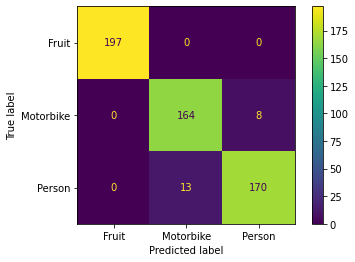

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
print("LBP Accuracy: "+str(accuracy_score(lbp_y_tst, y_pred)))
print('\n')
#print(classification_report(lbp_y_tst, y_pred))
confusion_matrix = metrics.confusion_matrix(lbp_y_tst, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Fruit", "Motorbike", "Person"])

cm_display.plot()
plt.show()

In [31]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)


0.9945652173913043


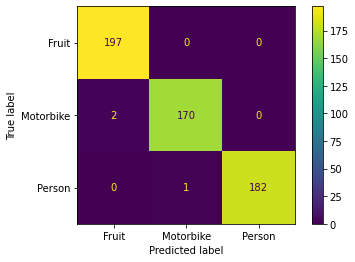

In [32]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
print(accuracy)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Fruit", "Motorbike", "Person"])

cm_display.plot()
plt.show()

In [19]:
# HOG, RF

# Training and testing datasets
HOG_x_trn,HOG_y_trn = create_dataset3(training_fruit_path,training_person_path, training_bike_path, 'HOG') 
HOG_x_tst,HOG_y_tst = create_dataset3(testing_fruit_path,testing_person_path, testing_bike_path, 'HOG')

# Feature Scaling
scaler = StandardScaler()
HOG_x_trn = scaler.fit_transform(HOG_x_trn)
HOG_x_tst = scaler.transform(HOG_x_tst)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(HOG_x_trn, HOG_y_trn)

# Predicting the Test set results
y_pred = classifier.predict(HOG_x_tst)

C:\Users\Mehedi\AppData\Local\Temp\ipykernel_11132\1529903522.py:42: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


HOG Accuracy: 0.9963768115942029




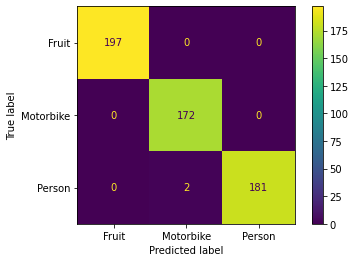

In [20]:
print("HOG Accuracy: "+str(accuracy_score(HOG_y_tst, y_pred)))
print('\n')
#print(classification_report(HOG_y_tst, y_pred))
confusion_matrix = metrics.confusion_matrix(HOG_y_tst, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Fruit", "Motorbike", "Person"])

cm_display.plot()

#plt.grid(b=None)
plt.show()

In [11]:
# LBP 

# Training and testing datasets
X_train,y_train = create_dataset3(training_fruit_path,training_person_path, training_bike_path, 'HOG') 
X_test,y_test = create_dataset3(testing_fruit_path,testing_person_path, testing_bike_path, 'HOG')



C:\Users\Mehedi\AppData\Local\Temp\ipykernel_11132\1529903522.py:42: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


In [12]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# loading the iris dataset
#iris = datasets.load_iris()

# X -> features, y -> label
#X = iris.data
#y = iris.target

# dividing X, y into train and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)


1.0


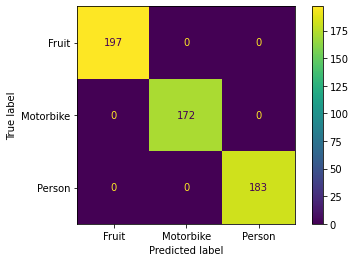

In [17]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

print(accuracy)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Fruit", "Motorbike", "Person"])

cm_display.plot()
plt.show()